In [1]:
import numpy as np
import sys
sys.path.append('../')

from clvm_tfp import clvm
import matplotlib.pyplot as plt

from utils.factor_plot import factor_plot
from clvm_tfp import build_toy_dataset

%matplotlib inline

In [2]:
# builds fake dataset from supplemental information of cLVM paper
x_train, y_train, labels = build_toy_dataset() #
print('shape of target data:', x_train.shape)
print('shape of background data:', y_train.shape)

shape of target data: (400, 30)
shape of background data: (400, 30)


In [3]:
model_0 = clvm(x_train, y_train, k_shared=0, k_target=2)
model_8 = clvm(x_train, y_train, k_shared=8, k_target=2)
model_10 = clvm(x_train, y_train, k_shared=10, k_target=2)
model_12 = clvm(x_train, y_train, k_shared=12, k_target=2)

In [4]:
ti_0 = model_0.variational_inference(num_epochs=1000)
ti_8 = model_8.variational_inference(num_epochs=4000)
ti_10 = model_10.variational_inference(num_epochs=4000)
ti_12 = model_12.variational_inference(num_epochs=4000)

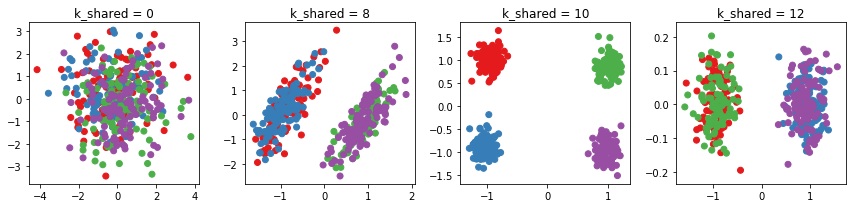

In [7]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(12,3)
ax[0].scatter(ti_0[:,0], ti_0[:,1], c=labels, cmap='Set1', vmin=0, vmax=9)
ax[0].set_title('k_shared = 0')
ax[1].scatter(ti_8[:,0], ti_8[:,1], c=labels, cmap='Set1', vmin=0, vmax=9)
ax[1].set_title('k_shared = 8')
ax[2].scatter(ti_10[:,0], ti_10[:,1], c=labels, cmap='Set1', vmin=0, vmax=9)
ax[2].set_title('k_shared = 10')
ax[3].scatter(ti_12[:,0], ti_12[:,1], c=labels, cmap='Set1', vmin=0, vmax=9)
ax[3].set_title('k_shared = 12')
fig.tight_layout()